In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as mt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [196]:
boston = load_boston()

In [197]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [198]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [199]:
features = pd.DataFrame(boston.data, columns = boston.feature_names)

In [200]:
target = pd.DataFrame(boston.target,columns = ["TARGET"])

In [201]:
data = pd.concat([features, target], axis = 1)

In [202]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [203]:
correl = data.corr('pearson')
correl

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [204]:
abs(correl["TARGET"]).sort_values()

CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
AGE        0.376955
RAD        0.381626
CRIM       0.388305
NOX        0.427321
TAX        0.468536
INDUS      0.483725
PTRATIO    0.507787
RM         0.695360
LSTAT      0.737663
TARGET     1.000000
Name: TARGET, dtype: float64

In [230]:
X = data["RM"]

In [236]:
Y = data["TARGET"]
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: TARGET, Length: 506, dtype: float64

In [237]:
Y = np.log(Y)/np.log(10)
Y

0      1.380211
1      1.334454
2      1.540329
3      1.523746
4      1.558709
5      1.457882
6      1.359835
7      1.432969
8      1.217484
9      1.276462
10     1.176091
11     1.276462
12     1.336460
13     1.309630
14     1.260071
15     1.298853
16     1.363612
17     1.243038
18     1.305351
19     1.260071
20     1.133539
21     1.292256
22     1.181844
23     1.161368
24     1.193125
25     1.143015
26     1.220108
27     1.170262
28     1.264818
29     1.322219
         ...   
476    1.222716
477    1.079181
478    1.164353
479    1.330414
480    1.361728
481    1.374748
482    1.397940
483    1.338456
484    1.313867
485    1.326336
486    1.281033
487    1.313867
488    1.181844
489    0.845098
490    0.908485
491    1.133539
492    1.303196
493    1.338456
494    1.389166
495    1.363612
496    1.294466
497    1.262451
498    1.326336
499    1.243038
500    1.225309
501    1.350248
502    1.313867
503    1.378398
504    1.342423
505    1.075547
Name: TARGET, Length: 50

In [238]:
X = (X - X.min())/(X.max() - X.min())

In [239]:
Y = (Y - Y.min())/(Y.max() - Y.min())

In [240]:
x = np.array(X)
y = np.array(Y)

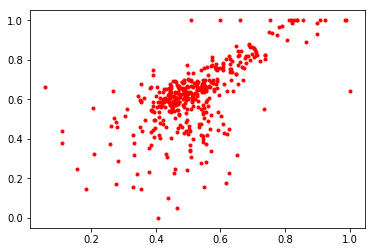

In [289]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
plt.plot(x_train, y_train, 'r.')

In [258]:
def hyp(a, x, b):
    exp = 0.4342944819
    return -1*(a*x*exp + b*exp)

In [269]:
def error(a, x, b, y):
    e = 0
    m = len(x)
    
    for i in range(m):
        e += np.power(hyp(a, x[i], b) - y[i], 2)
        
    return (1/(2*m))*e

In [270]:
def step_grad(a, x, b, y, learning):
    grad_a = 0
    grad_b = 0
    exp = 0.4342944819
    m = len(x)
    
    for i in range(m):
        grad_a += (1/m)*(hyp(a, x[i], b) - y[i])*x[i]*exp
        grad_b += (1/m)*(hyp(a, x[i], b) - y[i])*exp
        
    a = a + (grad_a*learning)
    b = b + (grad_b*learning)
    
    return a, b

In [271]:
def descnd(init_a, x, init_b, y, learning,  iteration):
    a = init_a
    b = init_b
    
    for i in range(iteration):
        e = error(a, x, b, y)
        
        if i % 1000 == 0:
            print(f"Error : {np.sqrt(e)}, a : {a}, b : {b}")
        a, b = step_grad(a, x, b, y, learning)
        
    return a, b

In [300]:
a = -1.9332033742321026
b = -0.4136353633238746
learning = 0.1
iteration = 20000

In [301]:
final_a, final_b = descnd(a, x_train, b, y_train, learning, iteration)

Error : 0.09331123555614938, a : -1.9332033742321026, b : -0.4136353633238746
Error : 0.09331122934924002, a : -1.9335038447670507, b : -0.41347744633147626
Error : 0.09331122563070927, a : -1.9337364127164907, b : -0.41335521660565633
Error : 0.09331122340295474, a : -1.9339164232160702, b : -0.4132606092702029
Error : 0.09331122206831736, a : -1.9340557535925789, b : -0.41318738201012656
Error : 0.09331122126874228, a : -1.9341635970453948, b : -0.4131307031956086
Error : 0.09331122078972055, a : -1.934247069225743, b : -0.41308683308477806
Error : 0.09331122050274095, a : -1.934311677736597, b : -0.41305287707069127
Error : 0.0933112203308127, a : -1.9343616855314942, b : -0.41302659469139574
Error : 0.09331122022781134, a : -1.9344003921897601, b : -0.41300625180133416
Error : 0.09331122016610366, a : -1.9344303516270285, b : -0.41299050615017363
Error : 0.09331122012913491, a : -1.9344535406059202, b : -0.4129783188193792
Error : 0.09331122010698717, a : -1.934471489165408, b : -0

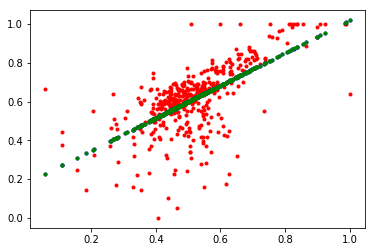

In [310]:
plt.plot(x_train, y_train, 'r.',
        x_train, hyp(a, x_train, b), 'b.',
        x_train, hyp(final_a, x_train, final_b,), 'g.')

In [307]:
final_a, final_b

(-1.9345250442827233, -0.41294073894291)

In [304]:
np.sqrt(error(final_a, x_test, final_b, y_test))

0.11121388171926198

In [306]:
error(final_a, x_test, final_b, y_test)

0.012368527487065994